In [ ]:
import numpy as np
import matplotlib.pyplot as plt  
from pathlib import Path

# set up folder paths
base_path = Path('..')

# 2D plots using imshow

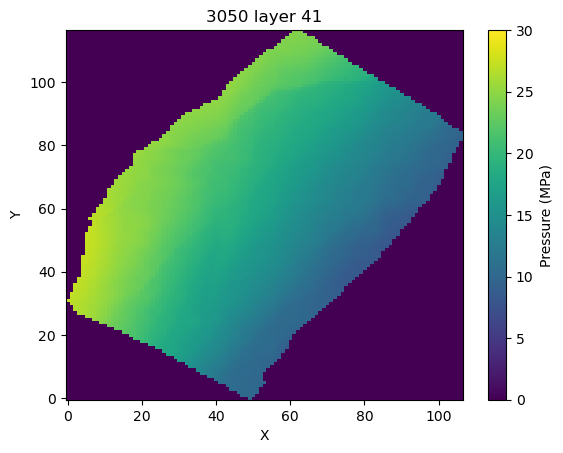

In [20]:
################## User Inputs ############################################################  
prop = "PRES";layer = 41; year = 3050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
################## End of User Inputs ##################################################### 
arr = np.load(base_path / 'data' /f'case1_{prop}.npy') 
arr_slice = arr[:,:,layer-1,year_list.index(year)]
plt.imshow(arr_slice.T/1000, origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=0, vmax=30)
plt.colorbar(label="Pressure (MPa)")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()

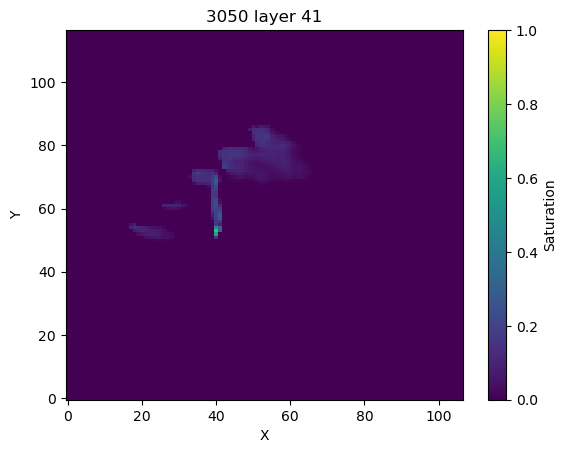

In [33]:
################## User Inputs ############################################################  
prop = "SG";layer = 41; year = 3050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
################## End of User Inputs ##################################################### 
arr = np.load(base_path / 'data' /f'case1_{prop}.npy')
arr_slice = arr[:,:,layer-1,year_list.index(year)]
plt.imshow(arr_slice.T, origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=0, vmax=1)
plt.colorbar(label="Saturation")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()